In [76]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt
import scipy.interpolate as interpolate
from mySSA import mySSA

In [77]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_sinha_2011 = np.genfromtxt('jhumar-wah-shikar2011_v1.txt', delimiter=",", dtype=float) # ismr reconstruction

In [78]:
yy_sinha_ann = np.flip(data_sinha_2011[:,0])
ismr_sinha_ann = np.flip(data_sinha_2011[:,1])

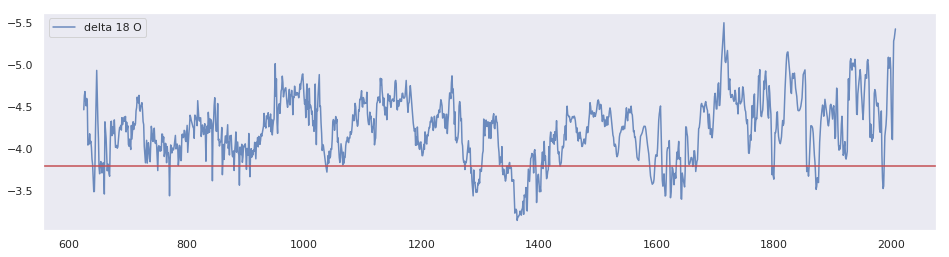

In [79]:
plt.figure(figsize=(16,4))
plt.plot(yy_sinha_ann, ismr_sinha_ann, label='delta 18 O', alpha=0.8)
plt.gca().invert_yaxis()
plt.axhline(y=-3.8, color='r')
plt.legend()
plt.grid()

Sinha, A. et al. The leading mode of Indian Summer Monsoon precipitation variability during the last millennium. Geophys. Res. Lett. 38, L15703 (2011).
Combined Core Monsoon Zone reconstruction from Jhumar and Dandak Caves
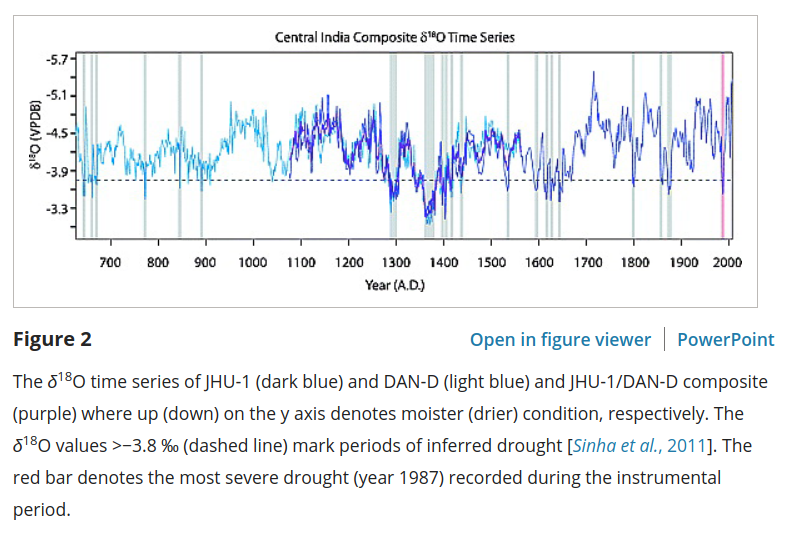

In [80]:
event_drought_sinha = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all_trop = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all_nh = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all_sh = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong_trop = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong_nh = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong_sh = np.zeros((yy_sinha_ann.shape[0]))

In [81]:
event_drought_sinha[ismr_sinha_ann>-3.8] = 1.0

for i in range(yy_sinha_ann.shape[0]):
    #print(event_yy_kobb[i])
    idx = np.asarray(np.where(volc[:,0] == yy_sinha_ann[i]))
    #print(idx.size)
    if idx.size==0:
        continue
    event_yy_volc_all[i] = 1.0
    if np.abs(volc[idx[0,0],2])>=5.0:
        event_yy_volc_strong[i] = 1.0
    
    if volc[idx[0,0],1] == 1.0:
        event_yy_volc_all_trop[i] = 1.0
    if volc[idx[0,0],1] == 2.0:
        event_yy_volc_all_nh[i] = 1.0
    if volc[idx[0,0],1] == 3.0:
        event_yy_volc_all_sh[i] = 1.0
        
    if (volc[idx[0,0],1] == 1.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_trop[i] = 1.0
    if (volc[idx[0,0],1] == 2.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_nh[i] = 1.0
    if (volc[idx[0,0],1] == 3.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_sh[i] = 1.0

In [8]:
np.savetxt('drought_sinha_2011.txt', event_drought_sinha, delimiter=",")
np.savetxt('all_volc_sinha_2011.txt', event_yy_volc_all, delimiter=",")
np.savetxt('strong_volc_sinha_2011.txt', event_yy_volc_strong, delimiter=",")
np.savetxt('all_tropical_sinha_2011.txt', event_yy_volc_all_trop, delimiter=",")
np.savetxt('strong_tropical_sinha_2011.txt', event_yy_volc_strong_trop, delimiter=",")
np.savetxt('all_nh_sinha_2011.txt', event_yy_volc_all_nh, delimiter=",")
np.savetxt('strong_nh_sinha_2011.txt', event_yy_volc_strong_nh, delimiter=",")
np.savetxt('all_sh_sinha_2011.txt', event_yy_volc_all_sh, delimiter=",")
np.savetxt('strong_sh_sinha_2011.txt', event_yy_volc_strong_sh, delimiter=",")

In [9]:
print(np.sum(event_yy_volc_all))
print(np.sum(event_yy_volc_strong))
print(np.sum(event_yy_volc_all_trop))
print(np.sum(event_yy_volc_strong_trop))
print(np.sum(event_yy_volc_all_nh))
print(np.sum(event_yy_volc_strong_nh))
print(np.sum(event_yy_volc_all_sh))
print(np.sum(event_yy_volc_strong_sh))

169.0
38.0
47.0
31.0
86.0
7.0
36.0
0.0


In [10]:
# Bootstrap
N = 1000
win = 5
count_elnino_all_volc = np.zeros((N, win))
count_elnino_strong_volc  = np.zeros((N, win))
count_elnino_all_trop  = np.zeros((N, win))
count_elnino_strong_trop  = np.zeros((N, win))
count_elnino_all_nh  = np.zeros((N, win))
count_elnino_strong_nh  = np.zeros((N, win))
count_elnino_all_sh  = np.zeros((N, win))

In [11]:
idx_all = np.asarray(np.where(event_yy_volc_all == 1.0))
idx_strong = np.asarray(np.where(event_yy_volc_strong == 1.0))
idx_all_trop = np.asarray(np.where(event_yy_volc_all_trop == 1.0))
idx_strong_trop = np.asarray(np.where(event_yy_volc_strong_trop == 1.0))
idx_all_nh = np.asarray(np.where(event_yy_volc_all_nh == 1.0))
idx_strong_nh = np.asarray(np.where(event_yy_volc_strong_nh == 1.0))
idx_all_sh = np.asarray(np.where(event_yy_volc_all_sh == 1.0))

In [12]:
print(idx_all[0])

[   1    4    7   12   16   32   46   57   63   69   73   88   92  100
  107  120  124  125  131  139  152  157  175  192  194  197  202  210
  212  216  228  234  244  251  254  255  275  279  283  291  304  314
  321  328  333  335  345  351  357  365  373  378  386  392  395  403
  414  432  439  442  467  483  490  493  502  512  546  555  557  566
  575  585  597  605  611  633  637  644  651  661  681  704  711  716
  720  753  756  764  783  789  791  816  823  828  833  838  845  852
  853  855  877  880  887  903  912  916  929  942  951  960  965  970
  976  994  996 1012 1016 1021 1029 1037 1042 1048 1068 1070 1083 1094
 1095 1096 1100 1104 1114 1131 1137 1141 1145 1158 1161 1171 1172 1184
 1190 1196 1198 1207 1211 1221 1228 1231 1237 1248 1250 1259 1262 1265
 1278 1283 1287 1294 1300 1301 1306 1318 1322 1332 1339 1343 1354 1357
 1366]


In [13]:
ismr_sinha_ann_norm = -(ismr_sinha_ann - np.mean(ismr_sinha_ann))/(np.std(ismr_sinha_ann))
niter = 0
while niter<N:
    rand_year_all = random.sample(list(idx_all[0]), 1)
    if (rand_year_all[0]<ismr_sinha_ann_norm.shape[0]-win):
        count_elnino_all_volc[niter,:] = ismr_sinha_ann_norm[rand_year_all[0]:rand_year_all[0]+win]
    
    rand_year_strong = random.sample(list(idx_strong[0]), 1)
    if (rand_year_strong[0]<ismr_sinha_ann_norm.shape[0]-win):
        count_elnino_strong_volc[niter,:] = ismr_sinha_ann_norm[rand_year_strong[0]:rand_year_strong[0]+win]
    
    rand_year_all_trop = random.sample(list(idx_all_trop[0]), 1)
    if (rand_year_all_trop[0]<ismr_sinha_ann_norm.shape[0]-win):
        count_elnino_all_trop[niter,:] = ismr_sinha_ann_norm[rand_year_all_trop[0]:rand_year_all_trop[0]+win]

    rand_year_strong_trop = random.sample(list(idx_strong_trop[0]), 1)
    if (rand_year_strong_trop[0]<ismr_sinha_ann_norm.shape[0]-win):
        count_elnino_strong_trop[niter,:] = ismr_sinha_ann_norm[rand_year_strong_trop[0]:rand_year_strong_trop[0]+win]

    rand_year_all_nh = random.sample(list(idx_all_nh[0]), 1)
    if (rand_year_all_nh[0]<ismr_sinha_ann_norm.shape[0]-win):
        count_elnino_all_nh[niter,:] = ismr_sinha_ann_norm[rand_year_all_nh[0]:rand_year_all_nh[0]+win]

    rand_year_strong_nh = random.sample(list(idx_strong_nh[0]), 1)
    if (rand_year_strong_nh[0]<ismr_sinha_ann_norm.shape[0]-win):
        count_elnino_strong_nh[niter,:] = ismr_sinha_ann_norm[rand_year_strong_nh[0]:rand_year_strong_nh[0]+win]

    rand_year_all_sh = random.sample(list(idx_all_sh[0]), 1)
    if (rand_year_all_sh[0]<ismr_sinha_ann_norm.shape[0]-win):
        count_elnino_all_sh[niter,:] = ismr_sinha_ann_norm[rand_year_all_sh[0]:rand_year_all_sh[0]+win]
    
    #print(s[rand_year_all[0]:rand_year_all[0]+win])
    #print(rand_year_all[0])
    niter = niter + 1 

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


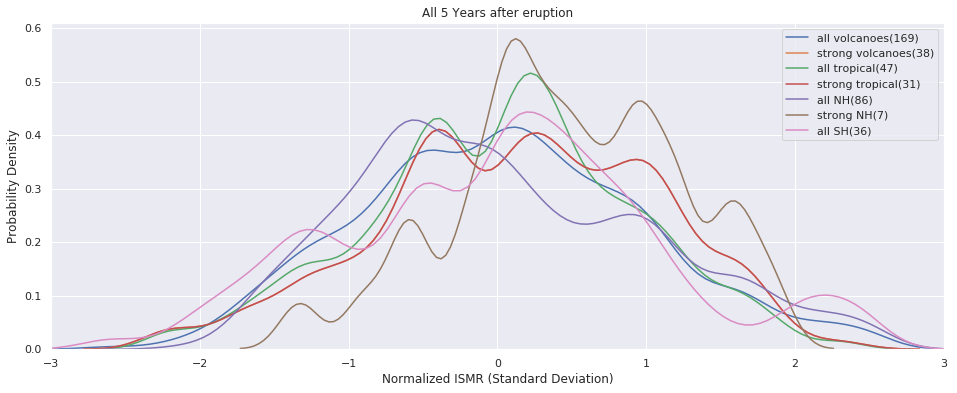

In [14]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc.flatten(), label='all volcanoes(169)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong volcanoes(38)')
sns.kdeplot(count_elnino_all_trop.flatten(), label='all tropical(47)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong tropical(31)')
sns.kdeplot(count_elnino_all_nh.flatten(), label='all NH(86)')
sns.kdeplot(count_elnino_strong_nh.flatten(), label='strong NH(7)')
sns.kdeplot(count_elnino_all_sh.flatten(), label='all SH(36)')
plt.title('All 5 Years after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized ISMR (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


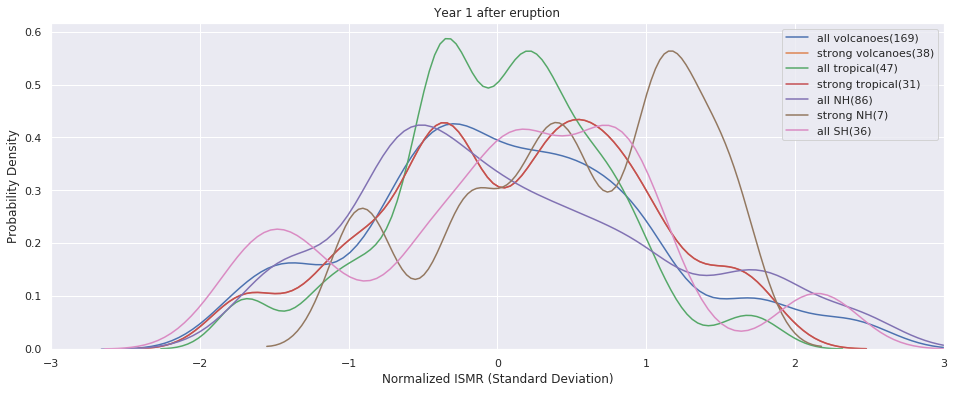

In [15]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,0], label='all volcanoes(169)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong volcanoes(38)')
sns.kdeplot(count_elnino_all_trop[:,0], label='all tropical(47)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong tropical(31)')
sns.kdeplot(count_elnino_all_nh[:,0], label='all NH(86)')
sns.kdeplot(count_elnino_strong_nh[:,0], label='strong NH(7)')
sns.kdeplot(count_elnino_all_sh[:,0], label='all SH(36)')
plt.title('Year 1 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized ISMR (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


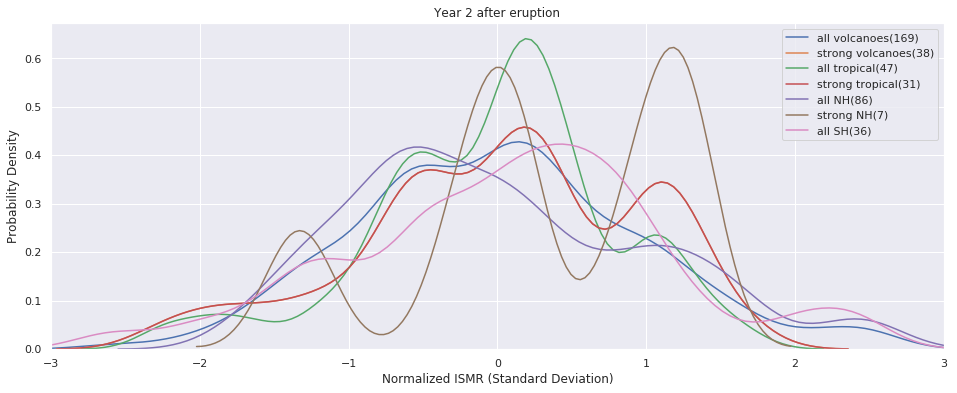

In [16]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,1], label='all volcanoes(169)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong volcanoes(38)')
sns.kdeplot(count_elnino_all_trop[:,1], label='all tropical(47)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong tropical(31)')
sns.kdeplot(count_elnino_all_nh[:,1], label='all NH(86)')
sns.kdeplot(count_elnino_strong_nh[:,1], label='strong NH(7)')
sns.kdeplot(count_elnino_all_sh[:,1], label='all SH(36)')
plt.title('Year 2 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized ISMR (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


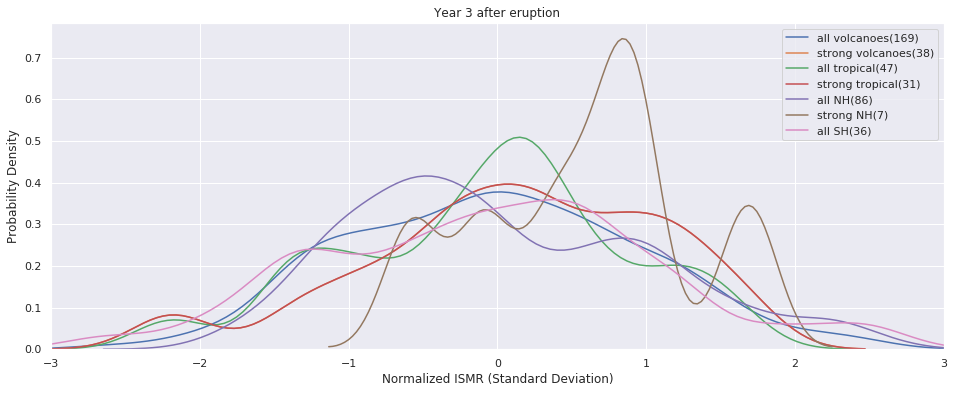

In [17]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,2], label='all volcanoes(169)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong volcanoes(38)')
sns.kdeplot(count_elnino_all_trop[:,2], label='all tropical(47)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong tropical(31)')
sns.kdeplot(count_elnino_all_nh[:,2], label='all NH(86)')
sns.kdeplot(count_elnino_strong_nh[:,2], label='strong NH(7)')
sns.kdeplot(count_elnino_all_sh[:,2], label='all SH(36)')
plt.title('Year 3 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized ISMR (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


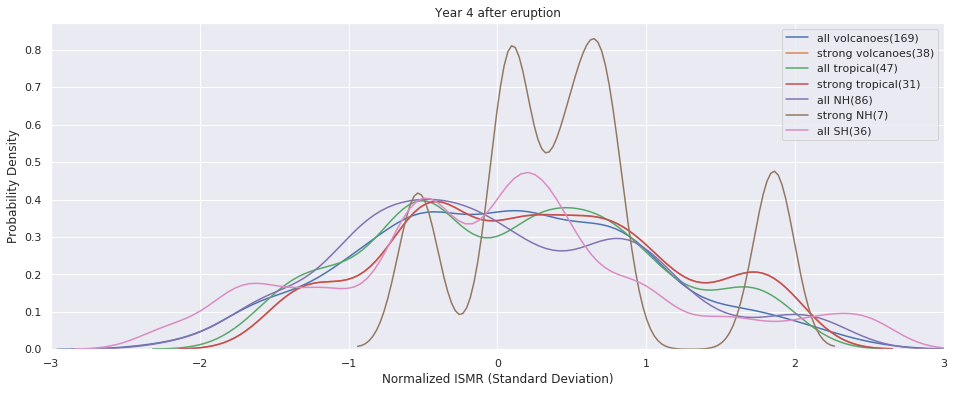

In [18]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,3], label='all volcanoes(169)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong volcanoes(38)')
sns.kdeplot(count_elnino_all_trop[:,3], label='all tropical(47)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong tropical(31)')
sns.kdeplot(count_elnino_all_nh[:,3], label='all NH(86)')
sns.kdeplot(count_elnino_strong_nh[:,3], label='strong NH(7)')
sns.kdeplot(count_elnino_all_sh[:,3], label='all SH(36)')
plt.title('Year 4 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized ISMR (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


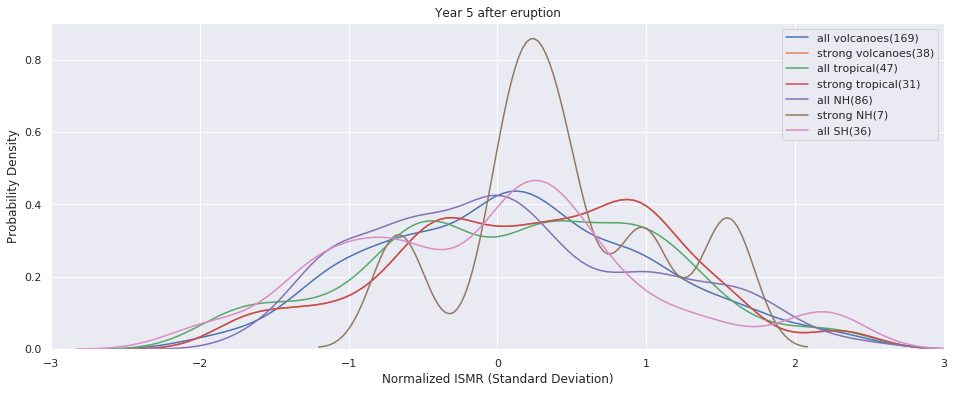

In [19]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,4], label='all volcanoes(169)')
sns.kdeplot(count_elnino_strong_volc[:,4], label='strong volcanoes(38)')
sns.kdeplot(count_elnino_all_trop[:,4], label='all tropical(47)')
sns.kdeplot(count_elnino_strong_volc[:,4], label='strong tropical(31)')
sns.kdeplot(count_elnino_all_nh[:,4], label='all NH(86)')
sns.kdeplot(count_elnino_strong_nh[:,4], label='strong NH(7)')
sns.kdeplot(count_elnino_all_sh[:,4], label='all SH(36)')
plt.title('Year 5 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized ISMR (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

In [49]:
np.percentile(ismr_sinha_ann, 88.035)

-3.8011378000000007

In [53]:
np.percentile(ismr_sinha_ann, 100-88.035)
# Singular Spectral Analysis as in Sinha et al 2015
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

def ssa(F):
    N = F.shape[0]
    L = 160# The window length.
    K = N - L + 1 # The number of columns in the trajectory matrix.
    # Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
    X = np.column_stack([F[i:i+L] for i in range(0,K)])
    # Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive. 
    d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.
    U, Sigma, V = np.linalg.svd(X)
    V = V.T # Note: the SVD routine returns V^T, not V, so I'll tranpose it back here. This may seem pointless, 
    X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
    n = min(12,d) # In case of noiseless time series with d < 12.
    # Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
    F_i = np.zeros((n,N))
    for i in range(n):
        F_i[i,:] = X_to_TS(X_elem[i])
    return F_i

In [54]:
ismr_sinha_ann_ssa = ssa(ismr_sinha_ann)

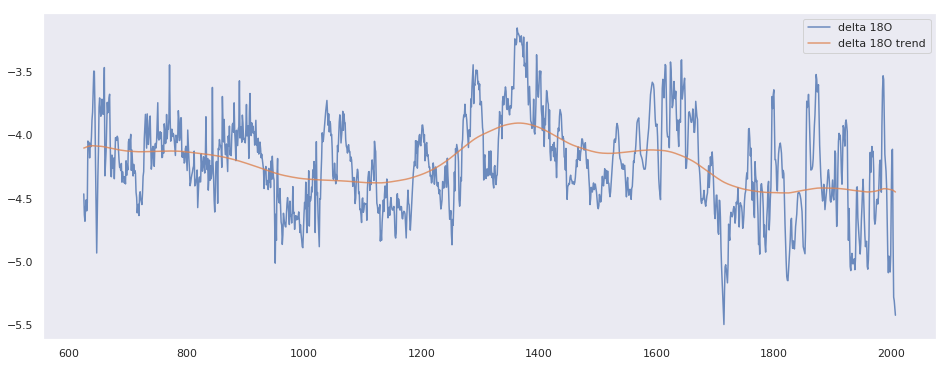

In [57]:
# Trend from Singular Spectral Analysis
plt.figure(figsize=(16,6))
plt.plot(yy_sinha_ann, ismr_sinha_ann, label='delta 18O', alpha=0.8)
plt.plot(yy_sinha_ann, ismr_sinha_ann_ssa[0], label='delta 18O trend', alpha=0.8)
plt.legend()
plt.grid()

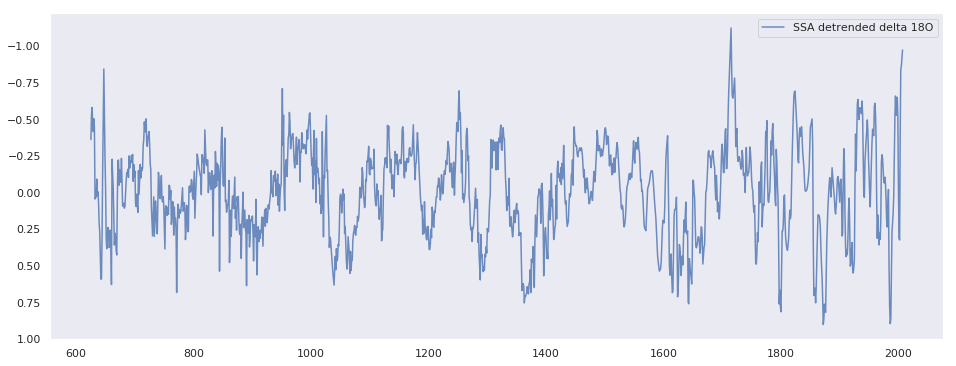

In [58]:
plt.figure(figsize=(16,6))
plt.plot(yy_sinha_ann, ismr_sinha_ann-ismr_sinha_ann_ssa[0], label='SSA detrended delta 18O', alpha=0.8)
plt.legend()
plt.gca().invert_yaxis()
plt.grid()

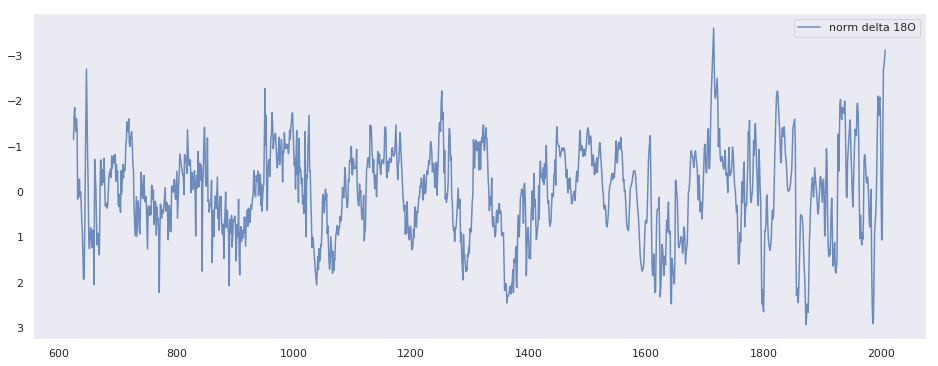

In [59]:
ismr_sinha_ann_ssa_anom = ismr_sinha_ann-ismr_sinha_ann_ssa[0]
ismr_sinha_ann_ssa_anom_norm  = (ismr_sinha_ann_ssa_anom - np.mean(ismr_sinha_ann_ssa_anom))/(np.std(ismr_sinha_ann_ssa_anom))
plt.figure(figsize=(16,6))
plt.plot(yy_sinha_ann, ismr_sinha_ann_ssa_anom_norm, label='norm delta 18O', alpha=0.8)
plt.legend()
plt.gca().invert_yaxis()
plt.grid()

In [82]:
ismr_sinha_2011_anom_yy = np.zeros((ismr_sinha_ann_ssa_anom_norm.shape[0],3))
ismr_sinha_2011_anom_yy[:,0] = yy_sinha_ann[:]
ismr_sinha_2011_anom_yy[:,1] = event_yy_volc_strong[:]
ismr_sinha_2011_anom_yy[:,2] = -ismr_sinha_ann_ssa_anom_norm[:]
np.savetxt('ismr_sinha_2011_anom_yy.txt', ismr_sinha_2011_anom_yy, delimiter=",")